In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score


#Obtenção do dataset

In [2]:
download_url = 'https://drive.google.com/uc?export=download&id='
url_drive_file = 'https://docs.google.com/spreadsheets/d/1ojgXmCtLpsIqs6pSQTyfewy5UlDy1ajI/edit#gid=1963201087'

download_path = download_url + url_drive_file.split('/')[-2]

dados_saude = pd.read_excel(download_path, 
                           
                sheet_name = 'Plan1',
                 header=0)

dados_saude.head()


,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


#Criação e execução do modelo com 2 grupos

##Modelo

In [3]:
kmeans_2 = KMeans(n_clusters=2, random_state=170)
y_pred =  kmeans_2.fit_predict(dados_saude)


In [4]:
dados_saude['cluster'] = y_pred
dados_saude

,Peso,Colesterol,Genero,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,1
4,130,158,1,1
...,...,...,...,...
542,172,207,1,0
543,129,157,1,1
544,107,115,1,1
545,117,147,1,1


##Preparação para visualização


In [5]:
Cluster_0 = dados_saude[dados_saude.cluster == 0]
Cluster_1 = dados_saude[dados_saude.cluster == 1]

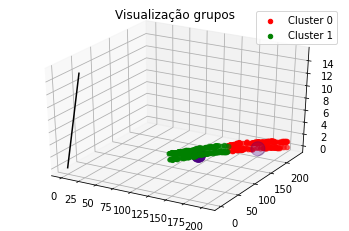

In [6]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(Cluster_0.Peso, Cluster_0.Colesterol, Cluster_0.Genero, c='red', label = 'Cluster 0')
kplot.scatter3D(Cluster_1.Peso, Cluster_1.Colesterol, Cluster_1.Genero,c ='green', label = 'Cluster 1')
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Visualização grupos")
plt.show()

##Metricas

In [7]:
score = silhouette_score(dados_saude,y_pred)
print(f'Silhueta Index: {score}')
davies_bouldin = davies_bouldin_score(dados_saude,y_pred) 
print(f'Davies-Bouldin: {davies_bouldin}')

Silhueta Index: 0.6314415693998991
Davies-Bouldin: 0.49308902399191124



#Criação do modelo com 4 clusters







##Modelo

In [8]:
kmeans_4 = KMeans(n_clusters=4, random_state=170)
y_pred =  kmeans_4.fit_predict(dados_saude)

In [9]:
dados_saude['cluster'] = y_pred
dados_saude

,Peso,Colesterol,Genero,cluster
0,102,111,1,3
1,115,135,1,3
2,115,136,1,3
3,140,167,0,1
4,130,158,1,1
...,...,...,...,...
542,172,207,1,0
543,129,157,1,1
544,107,115,1,3
545,117,147,1,1


##Preparação para visualização


In [10]:
Cluster_0 = dados_saude[dados_saude.cluster == 0]
Cluster_1 = dados_saude[dados_saude.cluster == 1]
Cluster_2 = dados_saude[dados_saude.cluster == 2]
Cluster_3 = dados_saude[dados_saude.cluster == 3]

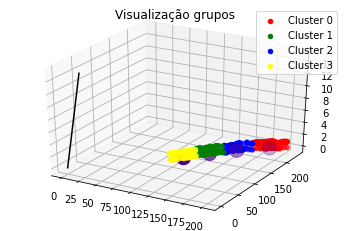

In [11]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(Cluster_0.Peso, Cluster_0.Colesterol, Cluster_0.Genero, c='red', label = 'Cluster 0')
kplot.scatter3D(Cluster_1.Peso, Cluster_1.Colesterol, Cluster_1.Genero,c ='green', label = 'Cluster 1')
kplot.scatter3D(Cluster_2.Peso, Cluster_2.Colesterol, Cluster_2.Genero,c ='blue', label = 'Cluster 2')
kplot.scatter3D(Cluster_3.Peso, Cluster_3.Colesterol, Cluster_3.Genero,c ='yellow', label = 'Cluster 3')
plt.scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Visualização grupos")
plt.show()

##Metricas

In [12]:
score = silhouette_score(dados_saude,y_pred)
print(f'Silhueta Index: {score}')

davies_bouldin = davies_bouldin_score(dados_saude,y_pred) 
print(f'Davies-Bouldin: {davies_bouldin}')

Silhueta Index: 0.5721424260672539
Davies-Bouldin: 0.5113026199154969


#Avaliação Final

In [13]:
print('Informações Cluster 0')
Cluster_0.describe()

Informações Cluster 0


,Peso,Colesterol,Genero,cluster
count,154.000000,154.000000,154.000000,154.0
mean,184.318182,218.915584,0.590909,0.0
std,9.809096,8.190502,0.493270,0.0
min,167.000000,204.000000,0.000000,0.0
25%,176.250000,212.250000,0.000000,0.0
50%,183.500000,220.000000,1.000000,0.0
75%,191.000000,225.000000,1.000000,0.0
max,203.000000,235.000000,1.000000,0.0


In [14]:
media_peso = Cluster_0['Peso'].mean()
media_colesterol = Cluster_0['Colesterol'].mean()
max_peso = Cluster_0['Peso'].max()
max_colesterol = Cluster_0['Colesterol'].max()
print('Individuos no grupo 0 tem colesterol médio em {:.2f} e peso médio em {:.2f}.'.format(media_colesterol,media_peso))
print(f'O maior colesterol é {max_colesterol} e o maior peso é {max_peso}  ')

Individuos no grupo 0 tem colesterol médio em 218.92 e peso médio em 184.32.
O maior colesterol é 235 e o maior peso é 203  


In [15]:
print('Informações Cluster 1')
Cluster_1.describe()

Informações Cluster 1


,Peso,Colesterol,Genero,cluster
count,135.000000,135.000000,135.000000,135.0
mean,127.725926,154.385185,0.459259,1.0
std,7.010046,9.823050,0.500193,0.0
min,115.000000,138.000000,0.000000,1.0
25%,122.000000,145.500000,0.000000,1.0
50%,128.000000,155.000000,0.000000,1.0
75%,134.000000,163.000000,1.000000,1.0
max,142.000000,171.000000,1.000000,1.0


In [16]:
media_peso = Cluster_1['Peso'].mean()
media_colesterol = Cluster_1['Colesterol'].mean()
max_peso = Cluster_1['Peso'].max()
max_colesterol = Cluster_1['Colesterol'].max()
print('Individuos no grupo 1 tem colesterol médio em {:.2f} e peso médio em {:.2f}.'.format(media_colesterol,media_peso))
print(f'O maior colesterol é {max_colesterol} e o maior peso é {max_peso}  ')

Individuos no grupo 1 tem colesterol médio em 154.39 e peso médio em 127.73.
O maior colesterol é 171 e o maior peso é 142  


In [17]:
print('Informações Cluster 2')
Cluster_2.describe()

Informações Cluster 2


,Peso,Colesterol,Genero,cluster
count,118.000000,118.000000,118.000000,118.0
mean,152.093220,185.906780,0.440678,2.0
std,6.967553,9.949434,0.498586,0.0
min,140.000000,168.000000,0.000000,2.0
25%,147.000000,177.000000,0.000000,2.0
50%,152.000000,187.500000,0.000000,2.0
75%,157.000000,194.000000,1.000000,2.0
max,169.000000,204.000000,1.000000,2.0


In [18]:
media_peso = Cluster_2['Peso'].mean()
media_colesterol = Cluster_2['Colesterol'].mean()
max_peso = Cluster_2['Peso'].max()
max_colesterol = Cluster_2['Colesterol'].max()
print('Individuos no grupo 2 tem colesterol médio em {:.2f} e peso médio em {:.2f}.'.format(media_colesterol,media_peso))
print(f'O maior colesterol é {max_colesterol} e o maior peso é {max_peso}  ')

Individuos no grupo 2 tem colesterol médio em 185.91 e peso médio em 152.09.
O maior colesterol é 204 e o maior peso é 169  


In [19]:
print('Informações Cluster 3')
Cluster_3.describe()

Informações Cluster 3


,Peso,Colesterol,Genero,cluster
count,140.000000,140.000000,140.000000,140.0
mean,106.850000,119.535714,0.542857,3.0
std,6.168993,10.138899,0.499949,0.0
min,95.000000,102.000000,0.000000,3.0
25%,101.750000,110.000000,0.000000,3.0
50%,107.000000,120.000000,1.000000,3.0
75%,112.000000,128.250000,1.000000,3.0
max,118.000000,138.000000,1.000000,3.0


In [20]:
media_peso = Cluster_3['Peso'].mean()
media_colesterol = Cluster_3['Colesterol'].mean()
max_peso = Cluster_3['Peso'].max()
max_colesterol = Cluster_3['Colesterol'].max()
print('Individuos no grupo 3 tem colesterol médio em {:.2f} e peso médio em {:.2f}.'.format(media_colesterol,media_peso))
print(f'O maior colesterol é {max_colesterol} e o maior peso é {max_peso}  ')

Individuos no grupo 3 tem colesterol médio em 119.54 e peso médio em 106.85.
O maior colesterol é 138 e o maior peso é 118  
